In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('./datasets/mnist_train_small.npy')

In [3]:
data.shape

(19999, 785)

In [4]:
X = data[:, 1:]
y = data[:, 0]

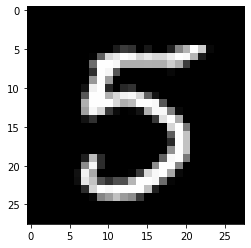

In [5]:
plt.imshow(X[0].reshape(28, 28), cmap="gray")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [7]:
model = KNeighborsClassifier()

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [10]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [11]:
model.score(X_test[:100], y_test[:100])

0.95

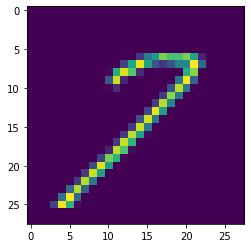

In [12]:
plt.imshow(X_test[0].reshape(28, 28))

In [13]:
class KNNCustom:
    
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X, y):
        self.X = X.astype(np.int64)
        self.y = y
    
    def predict_point(self, point):
        distances =[]
        
        for x_point, y_point in zip(self.X, self.y):
            dis = np.sqrt(((x_point - point) ** 2).sum())
            distances.append([dis, y_point])
        
        top_k = sorted(distances)[:self.n_neighbours]
        data, counts = np.unique(np.array(top_k, dtype=int)[:, 1], 
                                 return_counts=True)
        
        return data[np.argmax(counts)]
    
    def predict(self, X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        
        return np.array(results)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
            

In [14]:
m2 = KNNCustom()

In [15]:
m2.fit(X_train, y_train)

In [16]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [17]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [18]:
m2.score(X_test[:100], y_test[:100])

0.95

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y, )

TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'